In [5]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split    
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from RSData import *
from HaiYangData import *
from mpl_toolkits.basemap import Basemap
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sea_ice_model import * 

import graphviz
import pandas as pd
import numpy as np
import glob,os
import time
import datetime
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches



In [2]:
#数据切分, 按照7：3切分训练集与测试集
classes = ['nials', 'young ice', 'first year ice', 'old ice', 'fast ice']    
##  data_df：原始数据
##  object_col：目标变量

train_dir = r'd:\python_workfile\sea_ice_classification\\training6'

csv_dir = r'D:\python_workfile\sea_ice_classification\training6\csv\polarization_ratio'
csv_files = glob.glob(csv_dir + '\*.csv')


In [3]:
save_path = r'D:\python_workfile\sea_ice_classification\training6\scatter_plot'

In [4]:

data = get_data_from_csv(csv_files)

process_sea_ice_train_dataframe(data)

In [6]:
# 绘制
data['VV+HH'] = data['sig0_VV'] +data['sig0_HH'] 

data['VV-HH'] = data['sig0_VV'] -data['sig0_HH'] 

mean_VV_add_HH = data.groupby([data['year_month_str'],data['ice_type']]).mean()['VV+HH']

mean_VV_sub_HH = data.groupby([data['year_month_str'],data['ice_type']]).mean()['VV-HH']

icetype_two_polor_df = pd.merge(mean_VV_add_HH,mean_VV_sub_HH,on=['year_month_str','ice_type'])

icetype_two_polor_df.columns = ['VV+HH','VV-HH']

icetype_two_polor_df = icetype_two_polor_df.reset_index(level=1)

In [7]:
color_l = ['r','b','g','m','black']
FI = mpatches.Patch(color='black', label='Fast Ice')
OI = mpatches.Patch(color='m', label='Old Ice')
FYI = mpatches.Patch(color='g', label='First Year Ice')
YI = mpatches.Patch(color='b', label='Young Ice')
N = mpatches.Patch(color='r', label='Nilas')


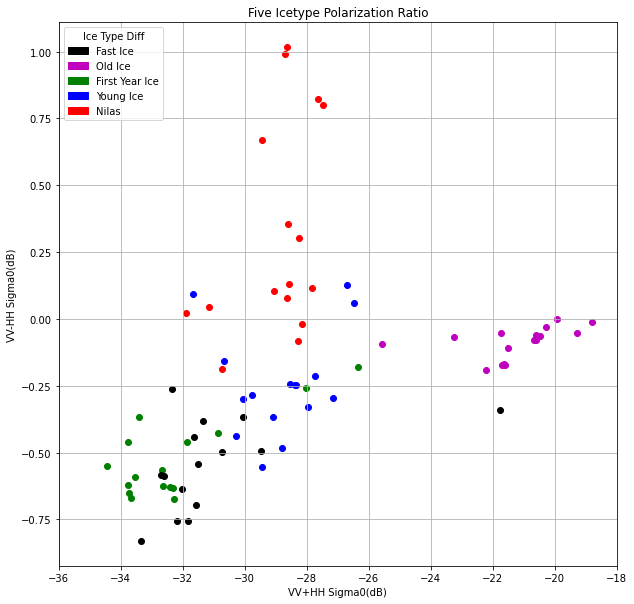

In [8]:
# 画极化比散点图
fig =plt.figure(figsize=(10,10))

plt.xlabel('VV+HH Sigma0(dB)')
plt.ylabel('VV-HH Sigma0(dB)')
for index in range(1,6):
    
    plt.scatter(icetype_two_polor_df[icetype_two_polor_df['ice_type']==index]['VV+HH'],icetype_two_polor_df[icetype_two_polor_df['ice_type']==index]['VV-HH'],c = color_l[index-1])
    
    plt.xticks(np.arange(-36,-16,2))
    plt.yticks(np.arange(-0.75,1.25,0.25))
# x = np.linspace(-20,-5,100)
# y=x
# plt.plot(x,y,'-r')
plt.title('Five Icetype Polarization Ratio')
plt.legend(loc='upper left',handles=[FI,OI ,FYI, YI ,N], title='Ice Type Diff')
plt.grid()
plt.savefig(save_path + r'\\icetype_VV_HH_polar_ratio.png')
plt.show()

In [9]:


mean_VV = data.groupby([data['year_month_str'],data['ice_type']]).mean()['sig0_VV']

mean_HH = data.groupby([data['year_month_str'],data['ice_type']]).mean()['sig0_HH']

icetype_two_polor_df = pd.merge(mean_VV,mean_HH,on=['year_month_str','ice_type'])

icetype_two_polor_df.columns = ['sig0_VV','sig0_HH']

icetype_two_polor_df = icetype_two_polor_df.reset_index(level=1)

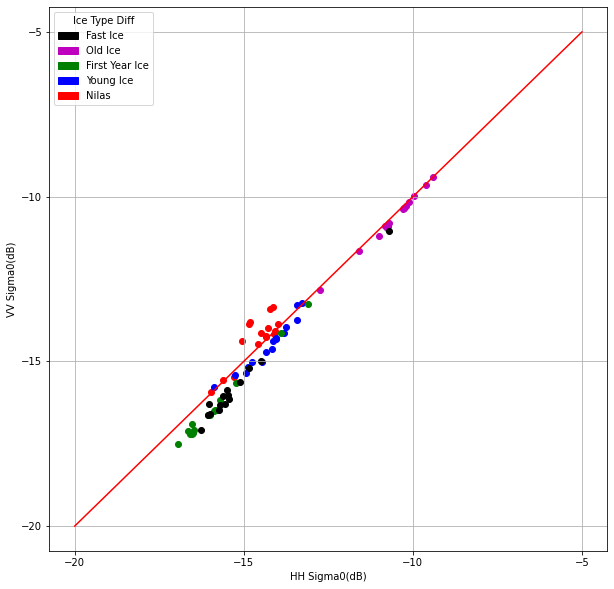

In [13]:
# 画月均后向散射系数散点图
fig =plt.figure(figsize=(10,10))

plt.xlabel('HH Sigma0(dB)')
plt.ylabel('VV Sigma0(dB)')
for index in range(1,6):
    
    plt.scatter(icetype_two_polor_df[icetype_two_polor_df['ice_type']==index]['sig0_HH'],icetype_two_polor_df[icetype_two_polor_df['ice_type']==index]['sig0_VV'],c = color_l[index-1])
    
    plt.xticks(np.arange(-20,-4.9,5))
    plt.yticks(np.arange(-20,-4.9,5))
x = np.linspace(-20,-5,100)
y=x
plt.plot(x,y,'-r')
plt.legend(loc='upper left',handles=[FI,OI ,FYI, YI ,N], title='Ice Type Diff')
plt.grid()
# plt.savefig('icetype_VV_HH_sig0.png')
plt.show()

In [16]:
icetype_two_polor_df[icetype_two_polor_df['ice_type']==5]

,ice_type,sig0_VV,sig0_HH
year_month_str,,,
201905,5,-16.297480,-16.036655
201911,5,-16.642074,-16.058820
201912,5,-16.019036,-15.476212
202001,5,-16.600275,-16.012843
202002,5,-16.327323,-15.692630
202003,5,-16.044713,-15.601078
202004,5,-15.868164,-15.486507
202005,5,-15.214937,-14.847927
202010,5,-11.055067,-10.714088
